In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

import os
import random
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [29]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Image (#2): Which is digit '4'


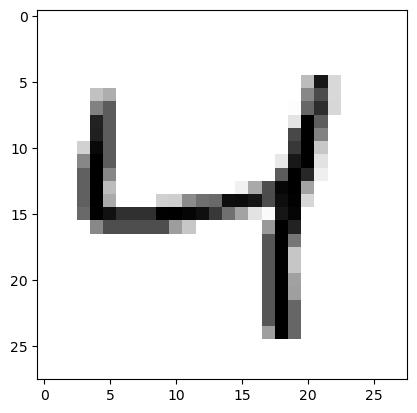

In [30]:
digit = 2 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

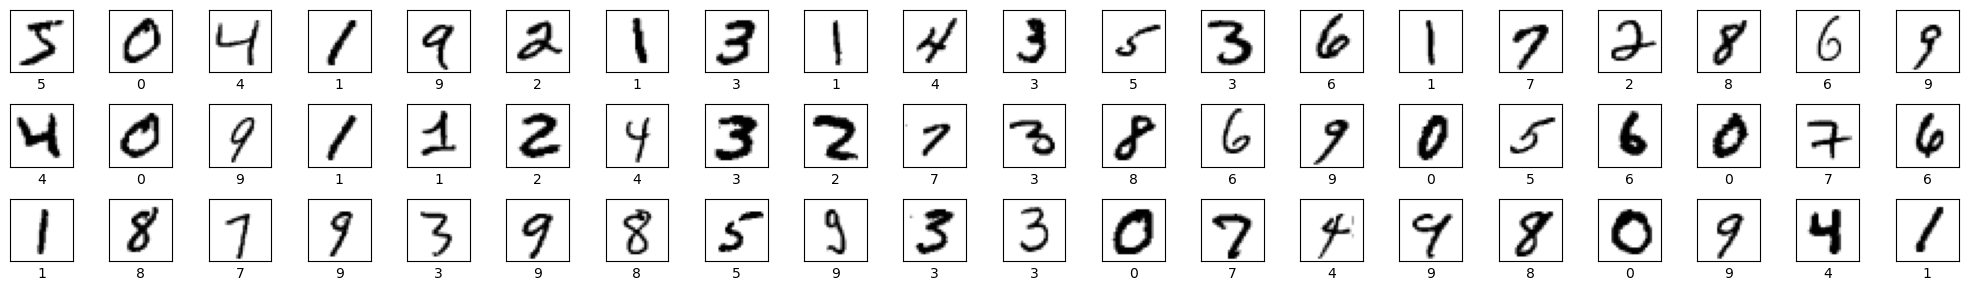

In [31]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show() 

Image (#20): Which is digit '4'


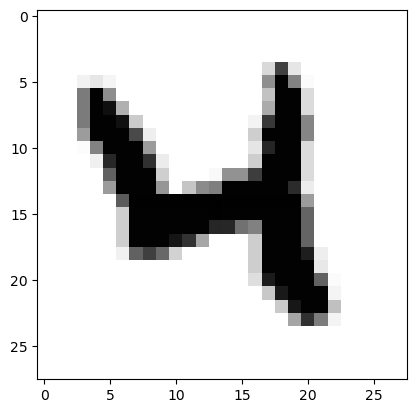

In [32]:
x_train = x_train.reshape(-1, 28*28).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28*28).astype("float32") / 255.0
digit = 20 # Change to choose new digit
a = x_train[digit].reshape(28,28)
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")

In [33]:
model = keras.Sequential([
    keras.Input(shape=28*28),
    layers.Dense(units=256, activation='relu'),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [35]:
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 7s 10ms/step - loss: 0.2737 - accuracy: 0.9199 - val_loss: 0.1470 - val_accuracy: 0.9544
Epoch 2/5
657/657 [==============================] - 5s 7ms/step - loss: 0.1053 - accuracy: 0.9676 - val_loss: 0.1091 - val_accuracy: 0.9680
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0664 - accuracy: 0.9797 - val_loss: 0.0996 - val_accuracy: 0.9697
Epoch 4/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.1072 - val_accuracy: 0.9686
Epoch 5/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0362 - accuracy: 0.9877 - val_loss: 0.0986 - val_accuracy: 0.9732


In [36]:
k=h
model.compile(
    optimizer='sgd', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0161 - accuracy: 0.9957 - val_loss: 0.0839 - val_accuracy: 0.9766
Epoch 2/5
657/657 [==============================] - 3s 4ms/step - loss: 0.0131 - accuracy: 0.9970 - val_loss: 0.0821 - val_accuracy: 0.9772
Epoch 3/5
657/657 [==============================] - 3s 4ms/step - loss: 0.0117 - accuracy: 0.9974 - val_loss: 0.0816 - val_accuracy: 0.9777
Epoch 4/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0108 - accuracy: 0.9977 - val_loss: 0.0809 - val_accuracy: 0.9777
Epoch 5/5
657/657 [==============================] - 3s 5ms/step - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0807 - val_accuracy: 0.9778


In [37]:
k1=h
model.compile(
    optimizer='RMSProp', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
h = model.fit(x=x_train, y=y_train, epochs=5, batch_size=64, validation_split=0.3)

Epoch 1/5
657/657 [==============================] - 5s 7ms/step - loss: 0.0219 - accuracy: 0.9930 - val_loss: 0.1149 - val_accuracy: 0.9716
Epoch 2/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0167 - accuracy: 0.9947 - val_loss: 0.1113 - val_accuracy: 0.9756
Epoch 3/5
657/657 [==============================] - 4s 6ms/step - loss: 0.0127 - accuracy: 0.9961 - val_loss: 0.1171 - val_accuracy: 0.9764
Epoch 4/5
657/657 [==============================] - 7s 10ms/step - loss: 0.0097 - accuracy: 0.9969 - val_loss: 0.1235 - val_accuracy: 0.9763
Epoch 5/5
657/657 [==============================] - 5s 8ms/step - loss: 0.0077 - accuracy: 0.9978 - val_loss: 0.1254 - val_accuracy: 0.9783


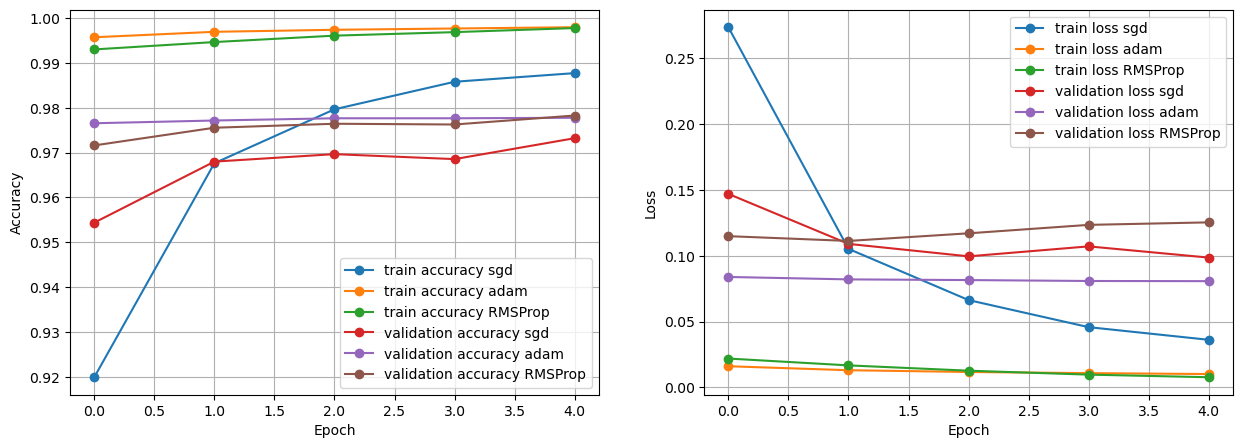

In [38]:
k2=h
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(k.history['accuracy'], 'o-', label='train accuracy sgd')
plt.plot(k1.history['accuracy'], 'o-', label='train accuracy adam')
plt.plot(k2.history['accuracy'], 'o-', label='train accuracy RMSProp')
plt.plot(k.history['val_accuracy'], 'o-', label = 'validation accuracy sgd')
plt.plot(k1.history['val_accuracy'], 'o-', label = 'validation accuracy adam')
plt.plot(k2.history['val_accuracy'], 'o-', label = 'validation accuracy RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(k.history['loss'], 'o-', label='train loss sgd')
plt.plot(k1.history['loss'], 'o-', label='train loss adam')
plt.plot(k2.history['loss'], 'o-', label='train loss RMSProp')
plt.plot(k.history['val_loss'], 'o-', label='validation loss sgd')
plt.plot(k1.history['val_loss'], 'o-', label='validation loss adam')
plt.plot(k2.history['val_loss'], 'o-', label='validation loss RMSProp')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
predictions = model.predict(x_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1037 - accuracy: 0.9787

Test accuracy: 0.9786999821662903
313/313 [==============================] - 1s 3ms/step
